----- Dataset Columns -----
['Date', 'Temperature (°C)', 'Humidity (%)', 'Pressure (hPa)', 'Rain (mm)', 'Precipitation (%)', 'WindSpeed (km/h)']

✅ Using 'Date' as datetime column.

Detected columns:
Temperature → Temperature (°C)
Humidity    → Humidity (%)
Rain        → Rain (mm)
Pressure    → Pressure (hPa)
Precipitation → Precipitation (%)


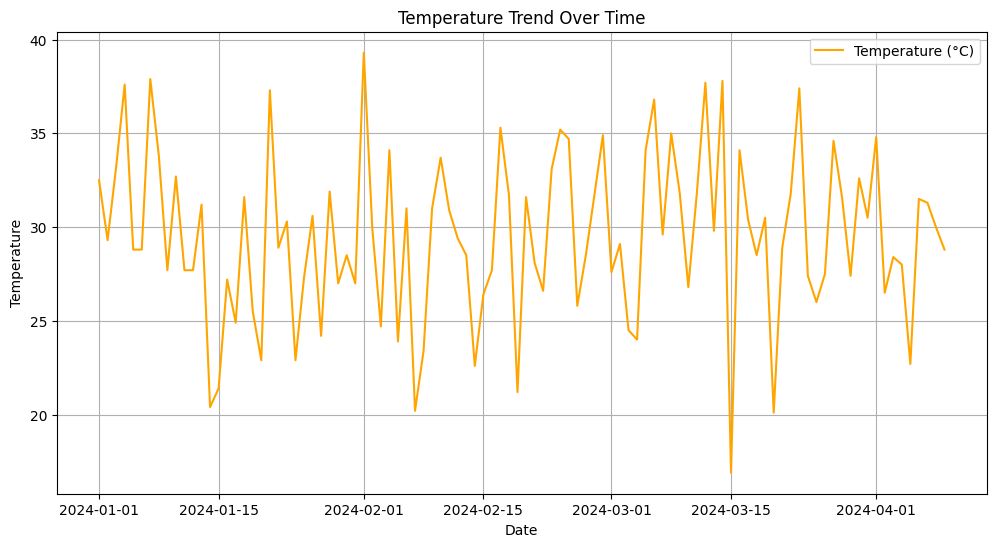

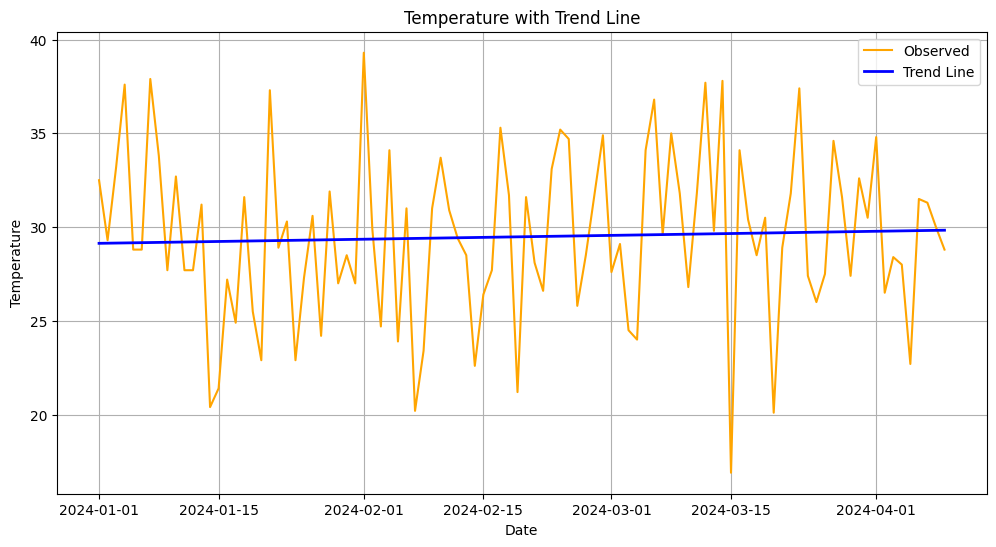

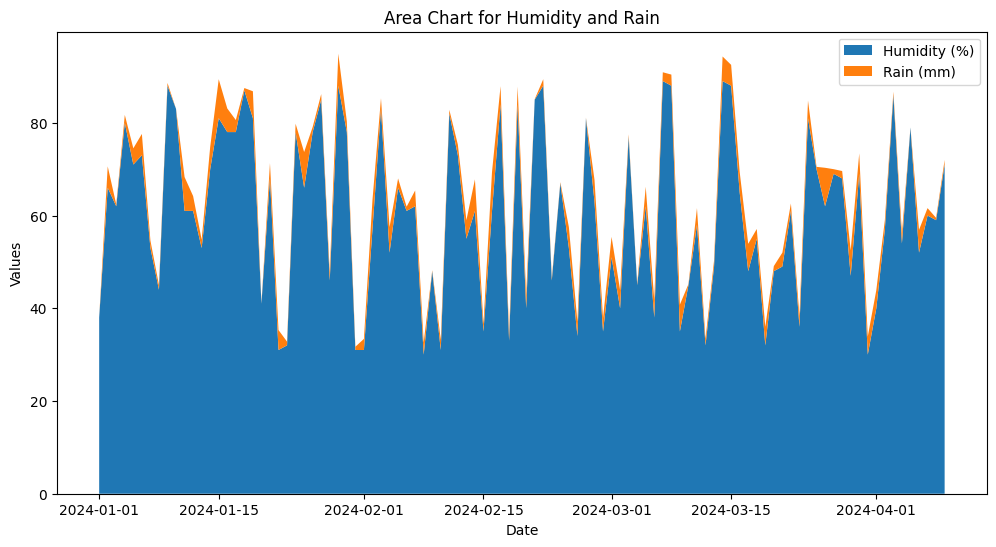

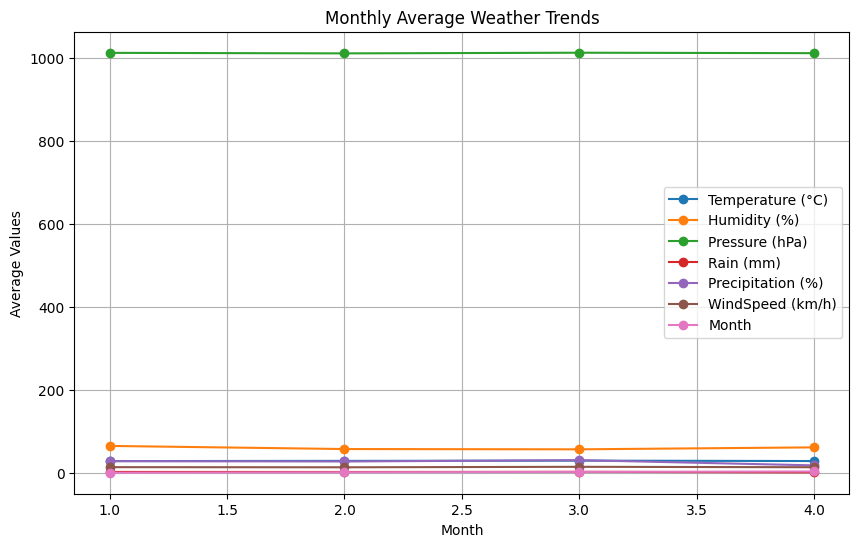


✅ Task 9: Time-Oriented Data Analysis Completed Successfully!


In [ ]:
# ---------------------------------------------------------------
# Task 9: Time Oriented Data Analysis (Auto Column Detection)
# ---------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ---------------------------------------------------------------
# Step 1: Load Dataset
# ---------------------------------------------------------------
df = pd.read_csv("delhi_weather_data.csv")
print("----- Dataset Columns -----")
print(df.columns.tolist())

# ---------------------------------------------------------------
# Step 2: Identify Date/Time Column Automatically
# ---------------------------------------------------------------
datetime_col = None
for col in df.columns:
    if any(x in col.lower() for x in ['date', 'time', 'day']):
        datetime_col = col
        break

if datetime_col:
    df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce')
    df = df.dropna(subset=[datetime_col])
    df = df.sort_values(by=datetime_col)
    df.set_index(datetime_col, inplace=True)
    print(f"\n✅ Using '{datetime_col}' as datetime column.")
else:
    raise ValueError("❌ No datetime column found. Please rename your date column to include 'date' or 'time'.")

# ---------------------------------------------------------------
# Step 3: Auto-detect key weather features
# ---------------------------------------------------------------
def find_col(keyword_list):
    for col in df.columns:
        for key in keyword_list:
            if key in col.lower():
                return col
    return None

temp_col = find_col(['temp', 'temperature'])
hum_col = find_col(['hum', 'humidity'])
rain_col = find_col(['rain'])
press_col = find_col(['press', 'pressure'])
prec_col = find_col(['precip', 'precipitation'])

print("\nDetected columns:")
print(f"Temperature → {temp_col}")
print(f"Humidity    → {hum_col}")
print(f"Rain        → {rain_col}")
print(f"Pressure    → {press_col}")
print(f"Precipitation → {prec_col}")

# ---------------------------------------------------------------
# Step 4: Clean Data
# ---------------------------------------------------------------
df.fillna(df.mean(numeric_only=True), inplace=True)

# ---------------------------------------------------------------
# Step 5: Line Graph for Temperature
# ---------------------------------------------------------------
if temp_col:
    plt.figure(figsize=(12,6))
    plt.plot(df.index, df[temp_col], label=temp_col, color='orange')
    plt.title('Temperature Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("⚠️ Temperature column not found — skipping line graph.")

# ---------------------------------------------------------------
# Step 6: Trend Line (Linear Regression)
# ---------------------------------------------------------------
if temp_col:
    X = np.arange(len(df)).reshape(-1, 1)
    y = df[temp_col].values

    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)

    plt.figure(figsize=(12,6))
    plt.plot(df.index, y, label='Observed', color='orange')
    plt.plot(df.index, trend, label='Trend Line', color='blue', linewidth=2)
    plt.title('Temperature with Trend Line')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.legend()
    plt.grid(True)
    plt.show()

# ---------------------------------------------------------------
# Step 7: Area Chart (Humidity + Rain if available)
# ---------------------------------------------------------------
area_cols = [c for c in [hum_col, rain_col] if c]
if len(area_cols) >= 1:
    plt.figure(figsize=(12,6))
    plt.stackplot(df.index, *[df[c] for c in area_cols], labels=area_cols)
    plt.title('Area Chart for Humidity and Rain')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend(loc='upper right')
    plt.show()
else:
    print("⚠️ No suitable columns found for area chart.")

# ---------------------------------------------------------------
# Step 8: Monthly Trend (Seasonal Pattern)
# ---------------------------------------------------------------
df['Month'] = df.index.month
num_cols = df.select_dtypes(include='number').columns
monthly_avg = df.groupby('Month')[num_cols].mean()

monthly_avg.plot(kind='line', figsize=(10,6), marker='o')
plt.title('Monthly Average Weather Trends')
plt.xlabel('Month')
plt.ylabel('Average Values')
plt.grid(True)
plt.show()

print("\n✅ Task 9: Time-Oriented Data Analysis Completed Successfully!")
